<h1>Projeto 1 - Bruno Domingues</h1>
<h1>Turma 2C</h1>
<h2>Pergunta:</h2>
<h3>Há relação da % que o setor industrial representa do PIB com o IDH? E da densidade populacional com o IDH?</h3>

In [23]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import *

In [3]:
#lendo as planilhas
IDH = pd.read_excel("hdi_human_development_index.xlsx")
Indu = pd.read_excel("industry_percent_of_gdp.xlsx")
Dens = pd.read_excel("population_density_per_square_km.xlsx")

In [4]:
#Ajustando a planilha de IDH para o ano de 2011 e tirando os NaN
IDH_2011 = IDH.loc[:,["geo",2011]]
IDH_2011_index = IDH_2011.set_index("geo")
IDH_2011_fix = IDH_2011_index.dropna()

In [5]:
#Ajustando a planilha de industria para o ano de 2011 e tirando os NaN
Indu_2011 = Indu.loc[:,["geo",2011]]
Indu_2011_index = Indu_2011.set_index("geo")
Indu_2011_fix = Indu_2011_index.dropna()

In [6]:
#Ajustando a planilha de densidade populacional para o ano de 2011 e tirando os NaN
Dens_2011 = Dens.loc[:,["geo",2011]]
Dens_2011_index = Dens_2011.set_index("geo")
Dens_2011_fix = Dens_2011_index.dropna()

In [7]:
#Juntando as três planilhas, ajustando o nome de colunas e do index
Junto_1 = IDH_2011_fix.join(Indu_2011_fix,how="inner",lsuffix=" IDH",rsuffix=" Industry % of GDP")
Ano2011Final = Junto_1.join(Dens_2011_fix,how="inner")
Ano2011Final.columns = ["HDI", "Industry % of GDP", "Pop. Dens. per square km"]
Ano2011Final.index.names = ["Country"]
Ano2011Final.head(10)

,HDI,Industry % of GDP,Pop. Dens. per square km
Country,,,
Afghanistan,0.463,23.5,45.50
Albania,0.752,28.2,107.00
Algeria,0.732,52.7,15.50
Andorra,0.819,13.6,178.00
Antigua and Barbuda,0.778,16.9,218.00
Argentina,0.822,30.0,15.20
Armenia,0.732,33.8,101.00
Australia,0.930,28.5,2.93
Austria,0.884,28.6,103.00


C:\Users\Bruno\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


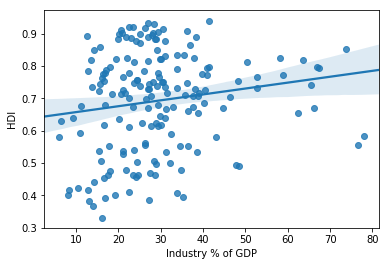

In [26]:
sns.regplot(Ano2011Final["Industry % of GDP"], Ano2011Final["HDI"])
plt.show()
